 <div style="background-color: #99CD4E; text-align:center; vertical-align: middle; padding:40px 0;"> 
  <h1 style="color: white;"> *Clustering documents using hierarchical algorithm* </h1>.
 </div>

## Hierarchical agglomerative clustering algorithm:
<hr style="color: olive; height: 1px;"/>

1. Start with n clusters (each observation = cluster)
2. The two closest observations are merged into one cluster
3. At each step, the two clusters with smallest distances are merged. This means that either single observations are added to existing clusters or two existing clusters are combined. 

<hr style="color: olive; height: 1px;"/>

_**Note**_ The text clustering example in this demo can be done using KMeans also.

[Clustering demo gif](https://makeagif.com/gif/hierarchical-clustering-DkJOLy) --- External Link

### Read movie data

In [1]:
import pandas as pd

data = pd.read_csv('./data/movie_data.csv')

data.head()

,id,plot,title
0,0,The aging patriarch of an organized crime dyna...,The Godfather
1,1,Chronicles the experiences of a formerly succe...,The Shawshank Redemption
2,2,"In German-occupied Poland during World War II,...",Schindler's List
3,3,When Jake LaMotta steps into a boxing ring and...,Raging Bull
4,4,"In World War II Casablanca, Rick Blaine, exile...",Casablanca


### Convert into TF-IDF form

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=1)
tfidf = tfidf_vectorizer.fit_transform(data['plot'])
terms = tfidf_vectorizer.get_feature_names()
# print(terms)

In [3]:
import numpy as np
print(np.shape(tfidf)) 

(100, 2493)


### Compute cosine similarity matrix 

cosine_similarity(...) create a square matrix in which the number of rows and columns is equal to the number of documents. dist[i, j] gives the cosine similarity between i and j titles.

cosine similarity gives distance 1 when items are close, and -1 when items are aprt. In the clustering algorithms higher the distance means that items are similar. Hence, we subtract the computed distance from 1.

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
dist_matrix = 1 - cosine_similarity(tfidf)   

### Perform hierarchial clustering

[linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) generates a structure that contains information about the two clusters ids that are merged at a step, along with the distance between the clusters and the number of clusters in the newly formed cluster.

In [5]:
from scipy.cluster.hierarchy import fcluster, linkage

distance_between_items = 0.1

linkage_matrix = linkage(dist_matrix, 'ward')
 
clusters = fcluster(linkage_matrix, distance_between_items, criterion='distance')

print(len(clusters))

100


## Plot dendogram

A dendogram is a tree like structure that summarizes the process of clustering. At the bottom are the records. Similar records are joined by lines whose vertical lines reflects the distance between the records. 

For any given number of clusters we can determine the records in the clusters by sliding a vertical line left and right until the number of vertical intersections of the line equals the number of clusters desired. 

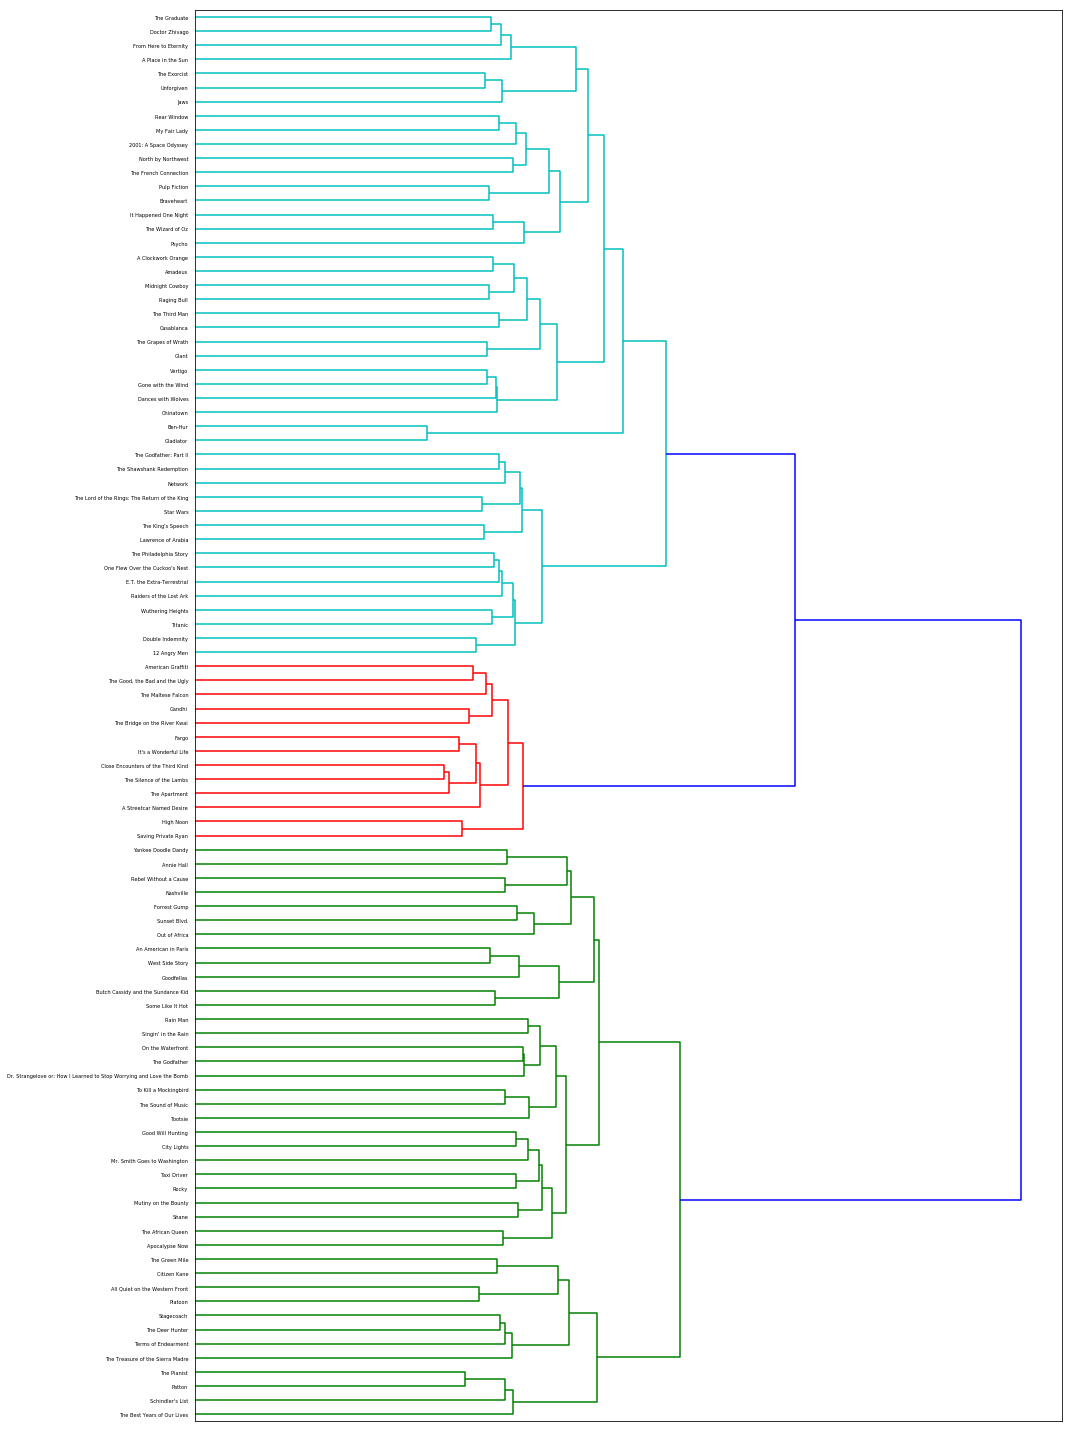

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=data['title'].tolist())

plt.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')

plt.tight_layout() #show plot with tight layout

plt.savefig("./data/dendogram.png", dpi=200) 

In [7]:
plt.close()

 <div style="background-color: #99CD4E; text-align:center; vertical-align: middle; padding:40px 0;"> 
  <h1 style="color: white;"> *The End* </h1>.
 </div>